In [64]:
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt
import pandas as pd
from scipy.sparse import csr_matrix
# this package is from https://www.cc.gatech.edu/~hpark/nmfsoftware.php



A = pd.read_csv('static_feature.csv', header = None)
A = A[A[1] == 1]
XK = pd.read_csv('design_matrix_3.csv', header = None)
XK = XK[XK[3] == 1]
K, P = A.shape
X_height = XK.shape[0]
R = max(XK.iloc[:, 2])
X = []
j = 0
for k in range(K):
    start = j
    while j < X_height and A.iloc[k, 0] == XK.iloc[j, 0]:
        j += 1
    X.append(XK.iloc[start : j, 1:-1])
A = A.iloc[:, 2:-1]
A[2] = 2010 - A[2] // 10000
for k in range(K):
    X[k] = csr_matrix(([1] * X[k].shape[0], ((X[k][1]-1), (X[k][2]-1))), shape = (X[k].iloc[-1, 0], R))

R = 5
A = A.to_numpy()

data_name = "Synethetic_data"

lambda_ = 1
mu = 1
conv_tol = 1e-5 #converegance tolerance
PARFOR_FLAG = 0 #parallel computing


In [141]:
import importlib
import sys
if "C:\\Users\\xli858\\Desktop\\TASTE" not in sys.path:
    sys.path.append("C:\\Users\\xli858\\Desktop\\TASTE")

import taste_frame
import nonnegfac
importlib.reload(taste_frame)
importlib.reload(nonnegfac)

normX, normA, Size_input = taste_frame.claculate_norm(X,A,K,PARFOR_FLAG) #Calculate the norm of the input X
Constraints = ['nonnegative', 'nonnegative','nonnegative','nonnegative']

itr = 5
seed = 1

TOTAL_running_TIME,rmse,FIT_Tensor,FIT_Matrix,RMSE_TIME,U,Q,H,V,W,F = taste_frame.TASTE_BPP(X,A,R,conv_tol,seed,PARFOR_FLAG,normX,normA,Size_input,Constraints,mu,lambda_)


Text(0, 0.5, 'RMSE')

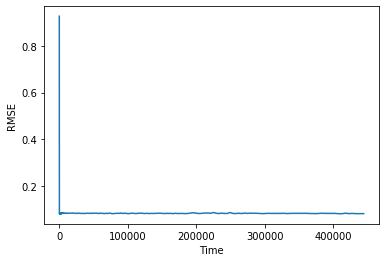

In [145]:
fig = plt.figure()

plt.plot([tup[0] for tup in RMSE_TIME], [tup[1] for tup in RMSE_TIME])
plt.xlabel("Time")
plt.ylabel("RMSE")